In [1]:
import numpy as np
# import theano as th
# import keras as kr
import matplotlib as mpl
from tensorflow import keras as kr
print('numpy:' + np.__version__)
#print('theano:' + th.__version__)
# print('keras:' + kr.__version__)
print('matplotlib:' + mpl.__version__)

numpy:1.23.2
matplotlib:3.6.2


In [2]:
import numpy as np
np.random.seed(123)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

MNIST — отличный набор данных для начала глубокого обучения и компьютерного зрения. Это достаточно сложная задача, чтобы гарантировать нейронные сети, но она управляема на одном компьютере.

Библиотека Keras удобно уже включает это.

Отлично, получается, что в нашем обучающем наборе 60 000 сэмплов, и размер каждого изображения составляет 28 х 28 пикселей. Мы можем подтвердить это, построив первый пример в matplotlib:

=== Результат y_train.shape ===
(60000,)
=== Результат y_train[:10] ===
[5 0 4 1 9 2 1 3 1 4]


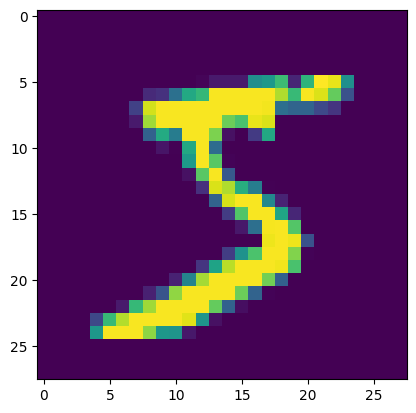

In [4]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование типа данных в float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Нормализация значений данных в диапазоне [0, 1]
X_train /= 255
X_test /= 255
print("=== Результат y_train.shape ===")
print(y_train.shape)
print("=== Результат y_train[:10] ===")
print(y_train[:10])
from matplotlib import pyplot as plt
plt.imshow(X_train[0])
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

Последовательная модель

В Keras, вы собираете слои (layers) для построения моделей (models). Модель это (обычно) граф слоев. Наиболее распространенным видом модели является стек слоев: модель tf.keras.Sequential.

Построим простую полносвязную сеть (т.е. многослойный перцептрон):


In [5]:
print(y_train.shape)

(60000,)


In [6]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [7]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
print(Y_train.shape)

(60000, 10)


In [9]:
model = Sequential()
model.add(Conv2D(32,(3, 3), activation = 'relu', input_shape=(1,28,28), data_format='channels_first'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


2024-04-21 16:09:55.361634: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-21 16:09:55.361978: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 26, 26)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 24, 32)        7520      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5760)              0         
                                                                 
 dense (Dense)               (None, 128)               737408    
                                                        

In [12]:
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 1, 28, 28], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_first", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Conv2D", "config": {"name": "conv2d_1", "trainable": true, "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "val

In [13]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices()))
# List all available physical devices
physical_devices = tf.config.list_physical_devices()
print("All physical devices:", physical_devices)

Num GPUs Available:  2
All physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [14]:
model.fit(X_train, Y_train, 
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10


2024-04-21 16:10:11.059958: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-21 16:10:11.237257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 46s 24ms/step - loss: 0.1583 - accuracy: 0.9519
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0531 - accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0376 - accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0274 - accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0216 - accuracy: 0.9930
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0138 - accuracy: 0.9954
Epoch 8/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0100 - accuracy: 0.9967
Epoch 10/10
1875/1875 [==============================] - 46s 24ms/step - lo

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

2024-03-17 15:17:14.865243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.03408659249544144, 0.9890999794006348]

In [ ]:
# loss: 0.0224 - accuracy: 0.9931